# Credit Card Fraud Detection Project

> By Eng. Ramy Gendy

<a id='Intro'></a>

## Introduction

> Credit card fraud detection (CCFD) is a challenging problem, which requires analyzing large volumes of transaction data to identify fraud patterns. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

> **Goal:** Learning efficient and accurate ML models for detecting frauds in massive streams of transactions as an early warning system by using `Python 3.8` on `Google Colab` to detect whether a transaction is a normal payment or a fraud.

> Project will tackle:
  * Outlier Analysis (Identify Rare data).
  * Dealing with imblanced & skewed class distributions.
  * Detect Fraud Patterns with ML Models:
    * Logistic Regression.
    * KNN.
    * DecisionTree.
    * Random Forest.
  * ML metrics for model validation.
  * Precision-Recall tradeoff.


## Table of Contents:
 * <a href="#Introduction">Introduction.</a>
 * <a href="#Dataset Overview">Dataset Overview.</a>
 * <a href="#Data Preparation">Data Preparation.</a>
 * <a href="#Data Preprocessing">Data Preprocessing.</a>
 * <a href="#Data Visualization">Data Visualization.</a>
 * <a href="#Feature Engineering">Feature Engineering.</a>
  * Feature Dimentionality Reduction.
  * Feature Selection (Domain knowledge features).
  * Feature Extraction.
 * <a href="#Model Selection">Model Selection.</a>
 * Fitting Data
 * Train
 * Test 
 * <a href="#Conclusion">Conclusion & Documentation</a>
 * Integration & Deployment
 * Monitor
 * Maintenance & Future Considerations
 * <a href="#References">References</a>

<a id='#Dataset Overview'></a>
## Dataset Overview

> Domain Knowledge Overview:
* The dataset contains transactions made by credit cards in September 2013 by European cardholders.
* Due to confidentiality issues, the original features and more background information about the data are not available. 
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
* It contains only numerical input variables which are the result of a PCA transformation.

> Investigation Overview:
* After data prepration we will start investigating by trying to answer the following **Questions:**
  01. <a href="#01"> ?</a>
  02. <a href="#02"> ?</a>
  03. <a href="#03"> ?</a>
  04. <a href="#04"> ?</a>
  05. <a href="#05"> ?</a>

## Data Preparation
  * Utilizing GPU processors on Colab (*Optional*).
  * Access Kaggle & Downloading Dataset (*Optional*).
  * Importing Librares.
  * Loading & Explorating Dataset.
  * Verify Understanding.

In [1]:
# Utilizing GPU Processors on Colab
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Access Kaggle & Downloading Dataset

> Will be using Kaggle API to call dataset. this part is ***optional***. this part can be skipped if you already using local machine or uploaded the dataset manually.

In [2]:
# Install Kaggle Package
# we add ` &> /dev/null ` to silence its output outside of any errors that may arise. 
#!pip install kaggle &> /dev/null

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ramygendy" # "Your_Username"
kaggle_key = "7295558003127d67ed7f47ebbb72c103" # "you_Kaggle_API_Token"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))


> Dataset can be downloaded directly from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3) or Call it directly from Kaggle API

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Importing Librares

> Importing required libraries, config. warnings and display settings.

In [7]:
# Importing libraries
# numpy library use to do array operations and also to do calculations
import numpy as np
# pandas library use to load dataset and also manipulate tabular data
import pandas as pd
# matplot library use to plot different graphs
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import rcParams
# seaborn library use to plot different plots
import seaborn as sns

#sklearn libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
import time


In [8]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [9]:
# Ignore matched warnings and never print them
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Set display format
rcParams['figure.figsize'] = 12,5
colors = ["#0101DF", "#DF0101"]
#  Aprox. for float numbers to the neareast 2 decimal points
#pd.options.display.float_format = "{:,.2f}".format
# Settings the display
#pd.set_option("display.max_columns", None)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

### Loading & Explorating Dataset

> Reading using `Pandas` dataframe and exploring & displaying it using `head()` or `tail()`, explore data using statistical summery `describe()`, information summery `info()`, check unique values `unique()` and count them`value_counts()`

In [11]:
# Read dataset
df = pd.read_csv('creditcard.csv')

In [12]:
# View dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Dataframe shape
df.shape

(284807, 31)

In [14]:
# Columns name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
# Information summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
# Statistical summery
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
# Check missing values
df.isnull().sum().max()

0

In [18]:
# Check duplicates
df.duplicated().sum()

1081

### Verify Understanding:
  1. The Data has only Target Variable `Class` as the categorical variable and it takes value `1` in case of fraud and `0` otherwise.
  2. Remaining Features are numerical and need to be only standardized for comparison after balancing the dataset 
  3. Features `V1, V2, … V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.
  4. Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
  5. The `Time` is distributed throughout the data equitably and hence, serves as an independent feature.
  6. The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.   
  7. The `mean` of the `Amount` of money in transactions is `88.34`.
  8. The `standard deviation` of `Amount` of money in transactions is `250.12`.
  9. It is best to not remove or drop any data or features in this case and try to tune the model assuming them as independent features initially.
  10. The Data does not have any missing values and hence, need not be handled.
  11. There is `1081` duplicated data needs to be handled.
    
    
 



## Data Preprocessing

1. Data Cleansing:
  * Check duplicated values.

In [19]:
# check if duplicated values relation with our target
ddf=df[df.duplicated()]
ddf.shape

(1081, 31)

In [20]:
# display original and duplicated rows
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [21]:
# Total number of duplicated values for our Fraud transaction in Target 'Class'
ddfsum = ddf[ddf["Class"]==1]['Class'].sum()
# 10% of total size of Fraud pool
totten= len(df[df['Class']==1])
DupToTot= round((ddfsum/totten)*100,2)
print ("Duplicated values in Fraud {} is about {} % of {} total values.".format(ddfsum,DupToTot,totten))
print ("Removel of duplication is accepted.")

Duplicated values in Fraud 19 is about 3.86 % of 492 total values.
Removel of duplication is accepted.


In [22]:
# drop duplicated values and reset index
df.drop_duplicates(inplace=True, ignore_index=True)

In [23]:
# Check duplicated rows
df.loc[df.duplicated(),:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


## Data Visualization
  * Univariante Analysis.
  * Bivariante Analysis.
  * Multivariante Analysis.
  * Questions Answers.

#### Univariate Analysis

In [24]:
# Ratio of fraud '1' and non fraud '0' cases compare to the whole dataset
df['Class'].value_counts()/len(df.index)

0    0.998333
1    0.001667
Name: Class, dtype: float64

Text(0.5, 1.0, 'Class Distributions (0: Not Fraud || 1: Fraud)')

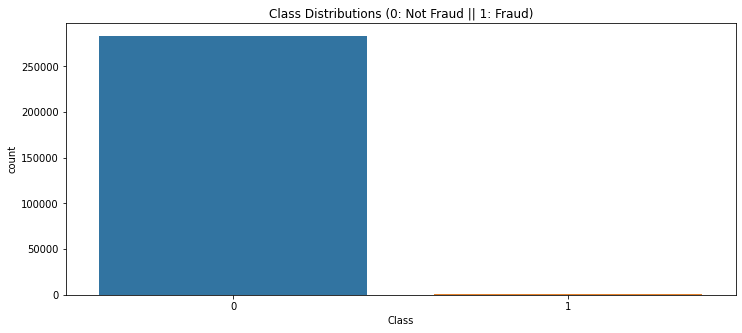

In [25]:
# Plot target distribution
sns.countplot('Class', data=df)
plt.title('Class Distributions (0: Not Fraud || 1: Fraud)', fontsize=12)

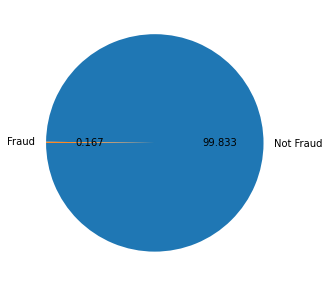

In [26]:
plt.pie(df.Class.value_counts(),labels=['Not Fraud','Fraud'],startangle=180,autopct='%.3f');



**Distributions:** it's clear now dataset is highly unbalanced with skewed features.


#### Bivariante Analysis
* Between *Target* variable and *Features*.

In [27]:
# Time statistical summary across fraud and not fraud transactions.
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Not Fraud")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


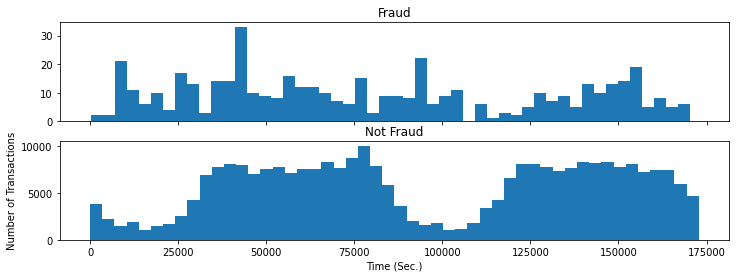

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show()

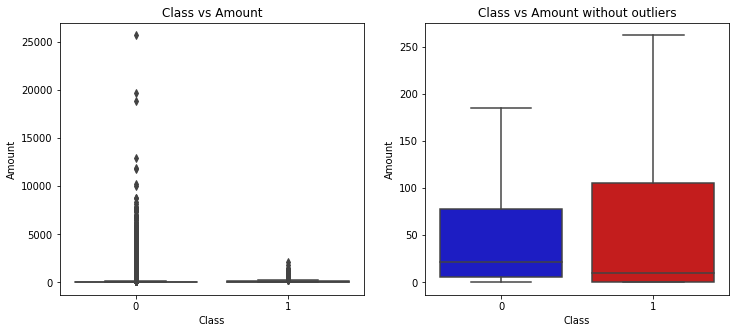

In [29]:
f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[0],showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[1],showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show()

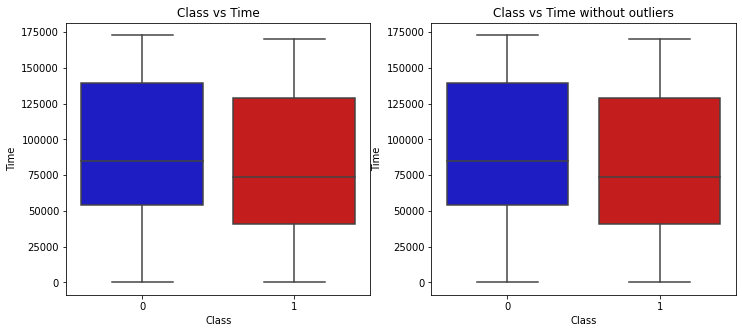

In [30]:
f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[0],showfliers=True)
axes[0].set_title('Class vs Time')

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[1],showfliers=False)
axes[1].set_title('Class vs Time without outliers')

plt.show()

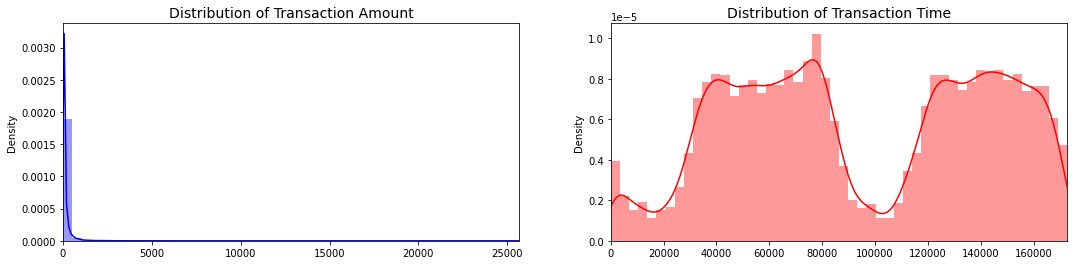

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

**Conclusion**
>  Range of values of `Amount` data varies widely, perfoming machine learning algorithms witout scaling, will result ML's objective functions will not work properly without normalization
> The non-fraudrent transaction have a larger mean value, larger `Q1`, smaller `Q3` and `Q4` and larger outliers; fraudulent transactions have a smaller `Q1` and mean, larger `Q4` and smaller outliers.

#### Multivariante Analysis

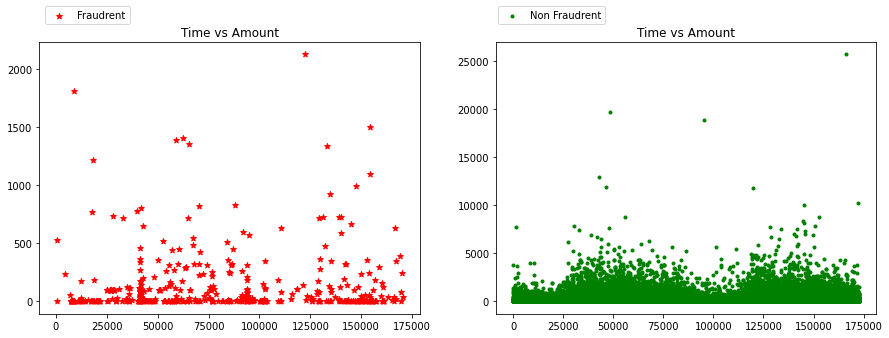

In [32]:
# plot relation with different scale
df1=df[df['Class']==1]
df2=df[df['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'],df1['Amount'],color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'],df2['Amount'],color='green', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

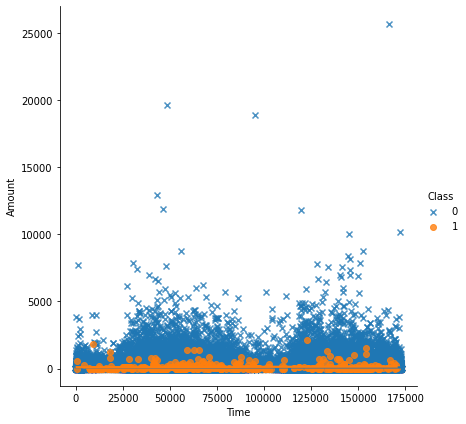

In [33]:
sns.lmplot(x='Time', y='Amount', hue='Class', markers=['x', 'o'], data=df, height=6);

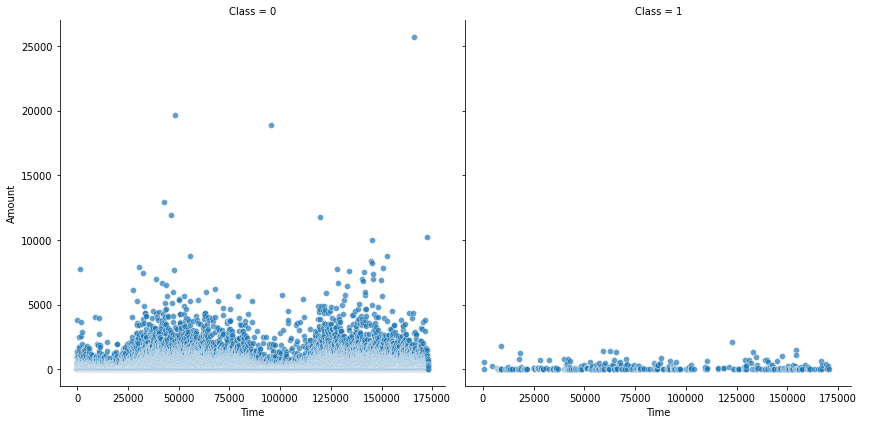

In [34]:
# plot relation in same scale
g = sns.FacetGrid(df, col="Class", height=6)
g.map(sns.scatterplot, "Time", "Amount", alpha=.7)
g.add_legend();

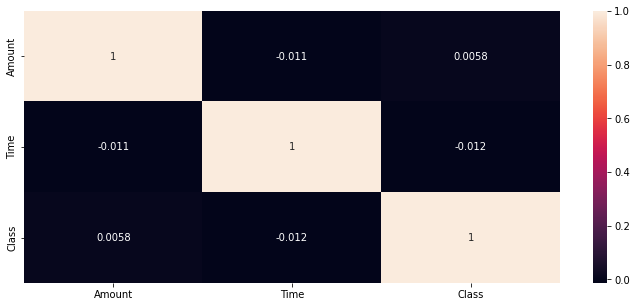

In [35]:
sns.heatmap(
    df.loc[:, ['Amount', 'Time', 'Class']].corr(),
    annot=True
);

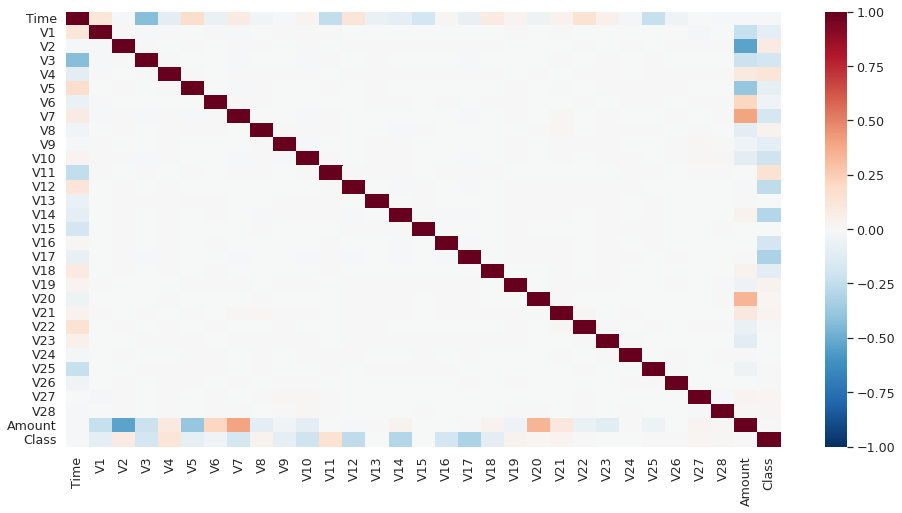

In [36]:
sns.set(font_scale=1.15)
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1);



> There is no notable correlation between features `V1 ~ V28`. There are certain correlations between some of these features and `Time` (inverse correlation with `V3`) and `Amount` (direct correlation with `V7` and `V20`, inverse correlation with `V1`, `V2` and `V5`).

> Let's plot the correlated and inverse correlated values on the same graph. starting with the direct correlated values: `V20` & `Amount` and `V7` & `Amount`.


<Figure size 864x360 with 0 Axes>

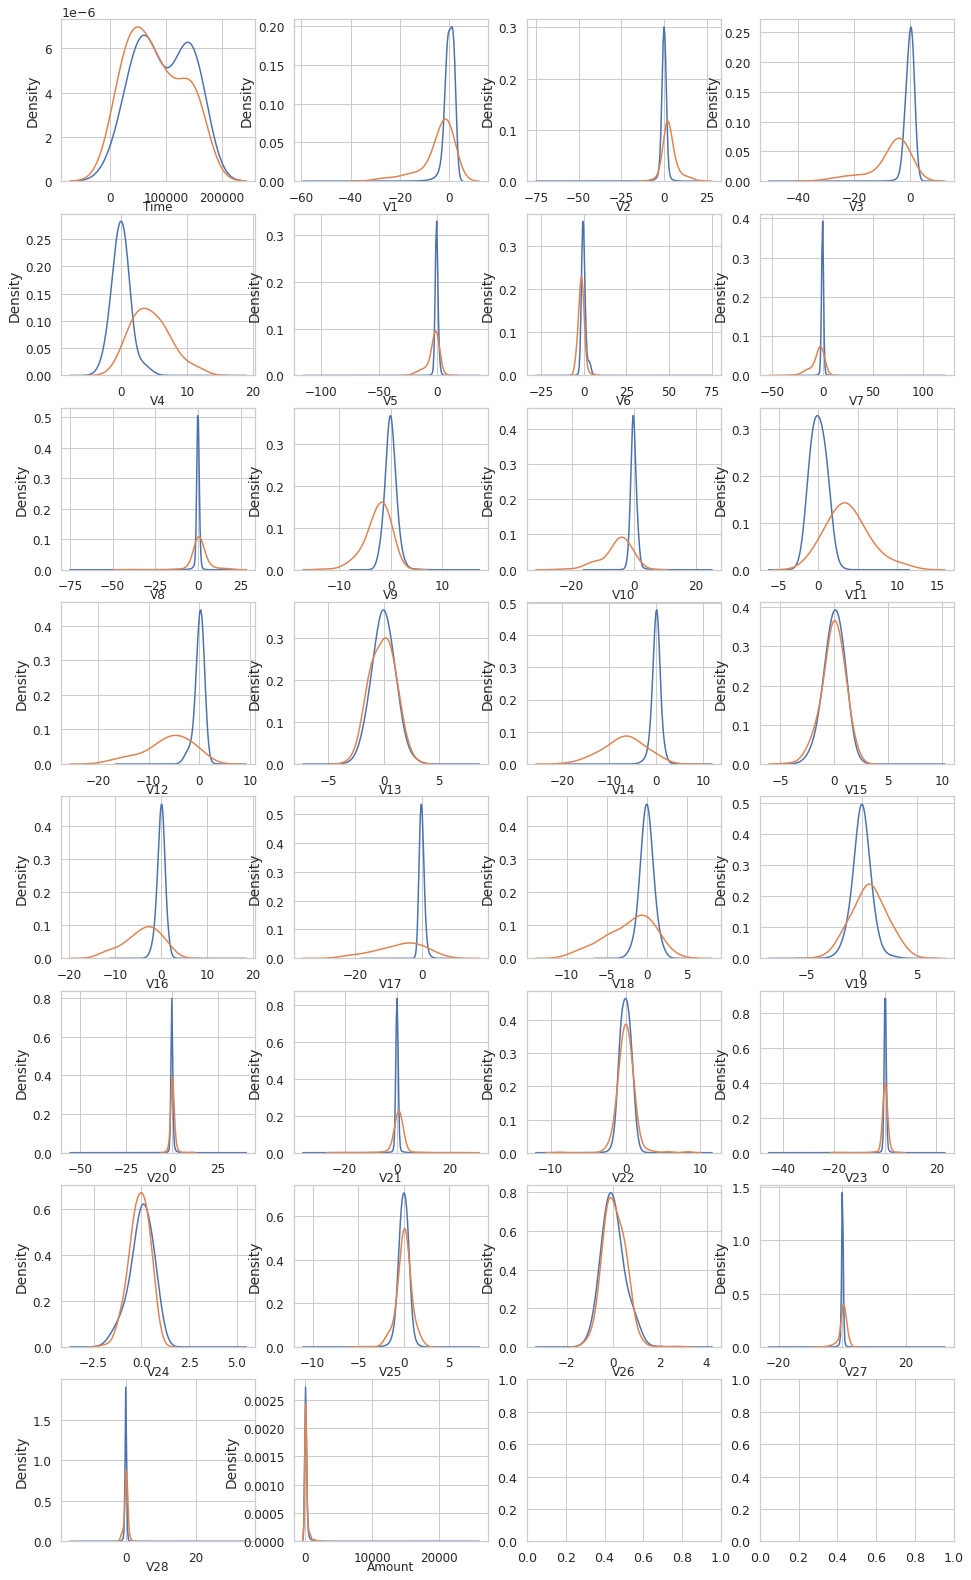

In [37]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var[0:-1]:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12, labelpad=-4)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

 > For some of the features we can observe a good selectivity in terms of distribution for the two values of `Class`:
 *  `V4, V11` have clearly separated distributions for `Class` values `0` & `1`.
 * `V12, V14, V18` are partially separated.
 *  `V1, V2, V3, V10` have a quite distinct profile.
 * `V25, V26, V28` have similar profiles for the two values of `Class`.
 * With a few exceptions in `Time` and `Amount`, the features distribution for non-fruadent transactions (values of `Class` equal `0`) is centered around `Zero`.
 * In the same time, the fraudulent transactions (values of `Class` equal `1`) have a skewed (asymmetric) distribution.

### **Data Distribution Conclusion**

* the is no point from further exploration and analysis for the target and feature relationships without balancing our dataset and handling outliers with feature engieering.
* Also, before deciding out classifier, it's robustness or not depend on the skewness. Risking is ***Overfit*** the dominating class while neglecting all other minor classes which are low in amount.
* The minority class could act as an outlier for the statistical model in imbalanced datasets.
* Outliers adversely affect a model’s performance.
* Ignoring ***Imbalance or Outliers*** it will lead to poor performance in the minority fraud class, which are our most important result. 
> ***Approach:*** 
> Balance the data by Performing ***Synthetic Minority Oversampling Technique (SMOTE)*** on the data to balance it out as shown later after exploring other features.
* This startegy aim to create synthetics examples of the minority class till the distribution of the data among the classes is the same. This can balance the class distribution but does not provide any additional information to the model in which it could risk an overfitting to the minority class.

## Feature Engineering

> Before jumping into balancing our dataset. First will scale features in dataset by perform **Standardization** as machine learning algorithms tend to perform better when numerical input variables are scaled to a standard range.

> Since most of our data has already been reduced in dimension by PCA, we should scale the columns that are left to scale `Amount` and `Time`.

In [38]:
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [39]:
# Re-arranging features
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

> our dataset after `Amount` and `Time` are Scaled!

In [40]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [41]:
# Statistical summery
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.924387,0.118912,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667
std,3.482123,0.557988,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796
min,-0.305938,-0.995290,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.228063,-0.358286,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000
50%,0.000000,0.000000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000
75%,0.771937,0.641714,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000
max,356.962314,1.035329,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


In [42]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset



**Fitting the Data**

* Before proceeding with the *Synthetic Minority Oversampling* technique we have to separate the orginal dataframe. 
* For Good testing and accuracy purposes, we are splitting the data when implementing *SMOTE*, we want to test our models on the original testing set, not on the testing set created by either of this technique. **Goal:** is to fit the model either with the dataframes that were implemented with *SMOTE*, and test it on the original testing set.
* This is done by using **Stratified KFold** as **cross-validator** that divides the dataset into **k folds** and **Stratified** is to ensure that each fold of dataset has the same proportion of observations with a given label. **resulting:** an improved version of classification tasks with imbalanced class distributions.

In [43]:
X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]


In [44]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# Check distribution
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99833466 0.00166534]
[0.99832584 0.00167416]


In [45]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

Length of X (train): 226981 | Length of y (train): 226981
Length of X (test): 56745 | Length of y (test): 56745


In [46]:
# SMOTE oversampling to minority class
sm=SMOTE(sampling_strategy='minority', random_state=42)
X_sm,y_sm=sm.fit_resample(original_Xtrain,original_ytrain)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(453206, 30) (453206,)
226603 226603


In [47]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(original_Xtest)
y_logreg_prob=logreg.predict_proba(original_Xtest)[:,1]

In [48]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_logreg))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_logreg))
print("Precision:",metrics.precision_score(original_ytest,y_logreg))
print("Recall:",metrics.recall_score(original_ytest,y_logreg))
print("F1-Score:",metrics.f1_score(original_ytest,y_logreg))
print("AUC:",metrics.roc_auc_score(original_ytest,y_logreg_prob))

Confusion Matrix:
 [[55979   671]
 [   13    82]]
Accuracy: 0.9879460745440127
Precision: 0.10889774236387782
Recall: 0.8631578947368421
F1-Score: 0.19339622641509432
AUC: 0.98106954057695


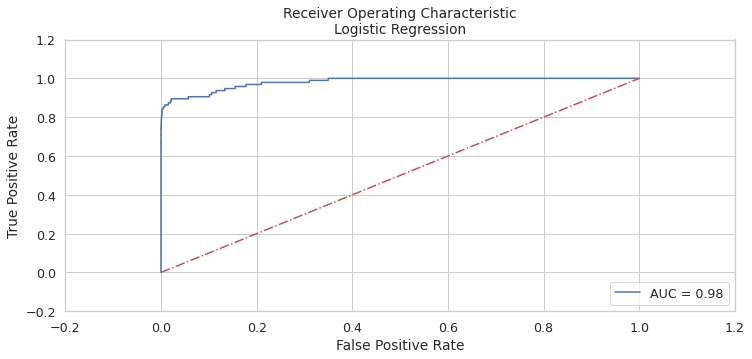

In [49]:
auc=metrics.roc_auc_score(original_ytest,y_logreg_prob)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
y_knn=knn.predict(original_Xtest)
y_knn_prob=knn.predict_proba(original_Xtest)[:,1]

In [51]:
#metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_knn))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_knn))
print("Precision:",metrics.precision_score(original_ytest,y_knn))
print("Recall:",metrics.recall_score(original_ytest,y_knn))
print("F1-Score:",metrics.f1_score(original_ytest,y_knn))
print("AUC:",metrics.roc_auc_score(original_ytest,y_knn))

Confusion Matrix:
 [[56586    64]
 [   19    76]]
Accuracy: 0.9985373160630893
Precision: 0.5428571428571428
Recall: 0.8
F1-Score: 0.6468085106382978
AUC: 0.8994351279788173


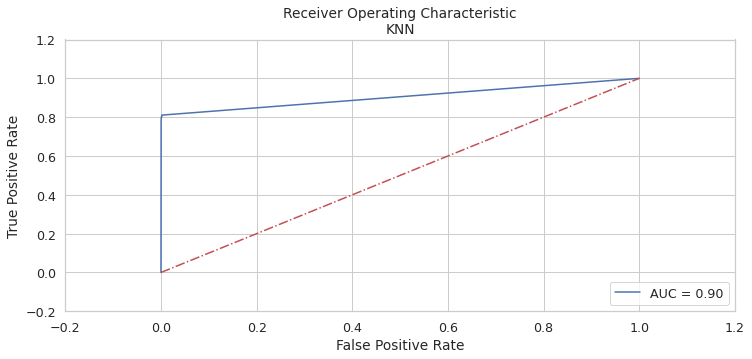

In [52]:
auc=metrics.roc_auc_score(original_ytest,y_knn)
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_knn_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nKNN')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(original_Xtest)
y_rf_prob=rf.predict_proba(original_Xtest)[:,1]

In [54]:
#metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_rf))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_rf))
print("Precision:",metrics.precision_score(original_ytest,y_rf))
print("Recall:",metrics.recall_score(original_ytest,y_rf))
print("F1-Score:",metrics.f1_score(original_ytest,y_rf))
print("AUC:",metrics.roc_auc_score(original_ytest,y_rf))

Confusion Matrix:
 [[56649     1]
 [   30    65]]
Accuracy: 0.9994536963609129
Precision: 0.9848484848484849
Recall: 0.6842105263157895
F1-Score: 0.8074534161490684
AUC: 0.8420964370325636


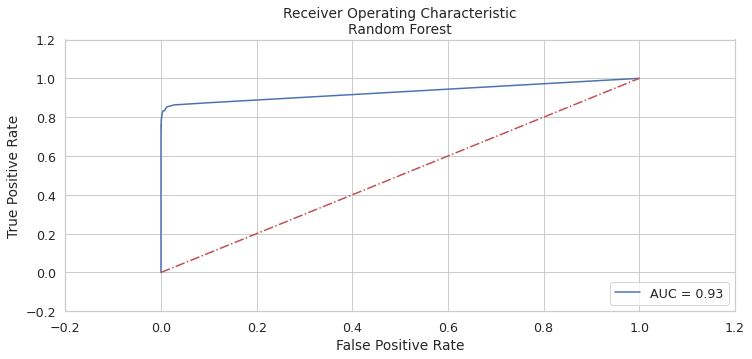

In [55]:
auc=metrics.roc_auc_score(original_ytest,y_rf_prob)
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()